In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
df=pd.read_csv('winequality-red.csv',sep=";")

In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
feature_list=df.columns[:-1].values
labels=[df.columns[-1]]
print("Feature List :",feature_list)
print("Labels :", labels)

Feature List : ['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol']
Labels : ['quality']


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [9]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [10]:
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

Text(0, 0.5, 'Count')

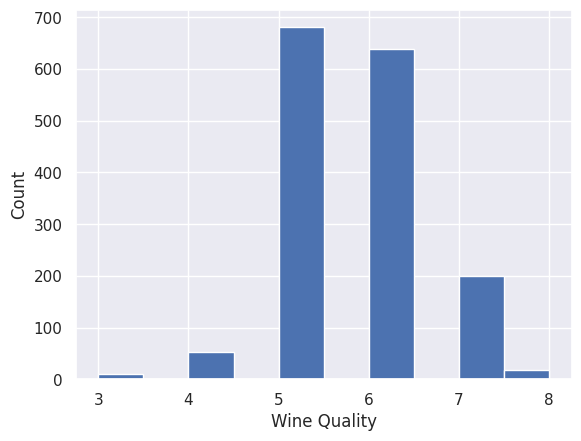

In [11]:
sns.set()
df.quality.hist()
plt.xlabel('Wine Quality')
plt.ylabel('Count')

In [12]:
from sklearn.model_selection import train_test_split

In [19]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
# random_state parameter to set the random seed, which ensures that the
#same examples are selected for test sets across runs.

#Create test set

#When we look at the test set, we are likely to notice patterns in that and based
#on that we may select certain models.
#This leads to biased estimation on test set, which may not generalize well in
#practice. This is called data snooping bias.

#Scikit-Learn provides a few functions for creating test sets based on
#1. Random sampling, which randomly selects k% points in the test set.
#2. Stratified sampling, which samples test examples such that they are
#representative of overall distribution.

In [21]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["quality"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [32]:
exploration_set = strat_train_set.copy()
#It's a good practice to make a copy of the data and apply preprocessing on that copy.
#This ensures that in case something goes wrong, we will at least have original copy of
#the data intact.

<Axes: xlabel='fixed acidity', ylabel='density'>

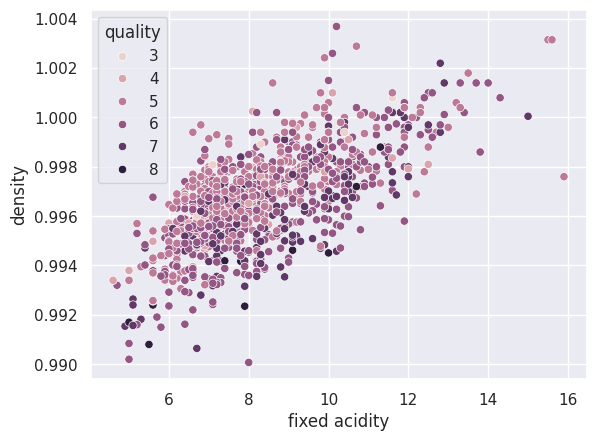

In [23]:
sns.scatterplot(x='fixed acidity', y='density', hue='quality',data=exploration_set)

<Axes: xlabel='fixed acidity', ylabel='density'>

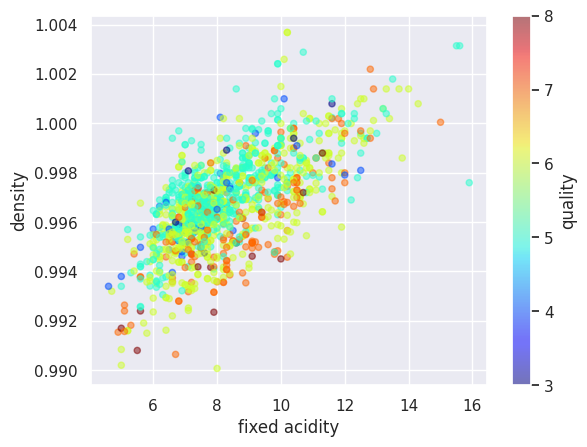

In [24]:
exploration_set.plot(kind='scatter', x='fixed acidity', y= 'density', alpha=0.5, c='quality', cmap=plt.get_cmap("jet"))

In [25]:
# Standard correlation coefficient between features.
# Ranges between -1 to +1
# Correlation = +1: Strong positive correlation between features
# Correlation = -1: Strong negative correlation between features
# Correlation = 0: No linear correlation between features
# Visualization with heat map
# Only captures linear relationship between features.
# For non-linear relationship, use rank correlation

In [26]:
corr_matrix = exploration_set.corr()

In [28]:
corr_matrix['quality']

#Notice that quality has strong positive
#correlation with alcohol content [0.48] and
#strong negative correlation with volitile
#acidity [-0.38].

fixed acidity           0.107940
volatile acidity       -0.383249
citric acid             0.210802
residual sugar          0.003710
chlorides              -0.120231
free sulfur dioxide    -0.048291
total sulfur dioxide   -0.194511
density                -0.193009
pH                     -0.052063
sulphates               0.228050
alcohol                 0.481197
quality                 1.000000
Name: quality, dtype: float64

<Axes: >

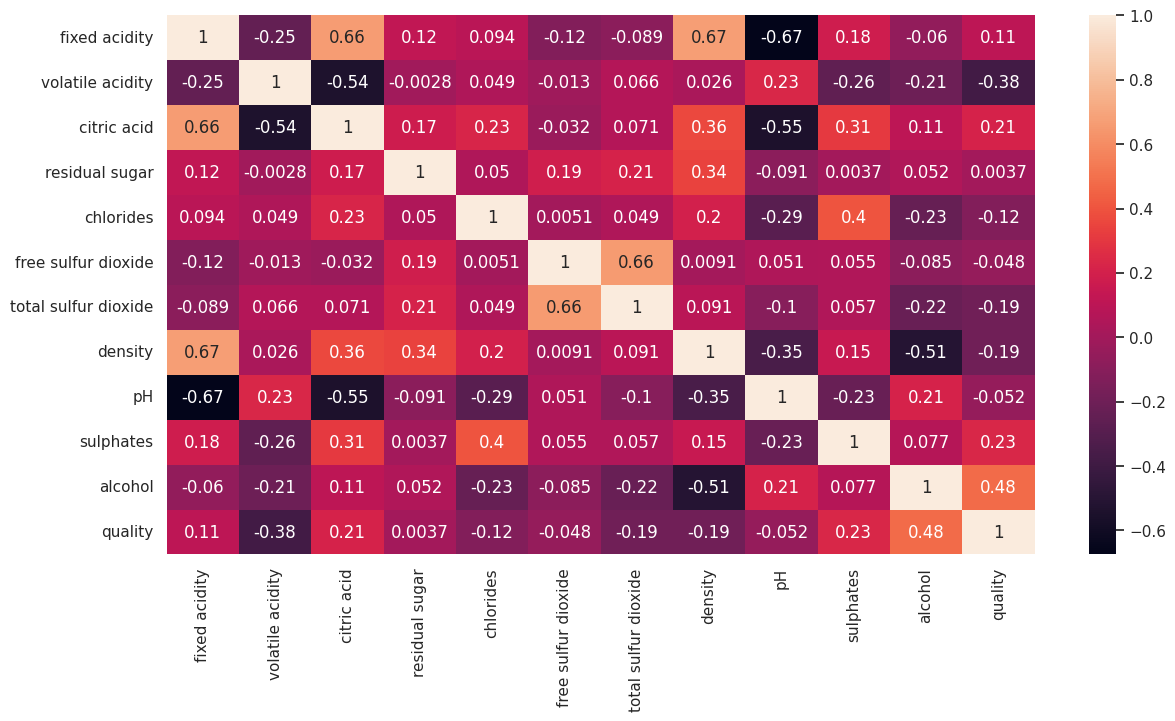

In [29]:
plt.figure(figsize=(14,7))
sns.heatmap(corr_matrix, annot=True)

array([[<Axes: xlabel='citric acid', ylabel='citric acid'>,
        <Axes: xlabel='pH', ylabel='citric acid'>,
        <Axes: xlabel='alcohol', ylabel='citric acid'>,
        <Axes: xlabel='sulphates', ylabel='citric acid'>,
        <Axes: xlabel='quality', ylabel='citric acid'>],
       [<Axes: xlabel='citric acid', ylabel='pH'>,
        <Axes: xlabel='pH', ylabel='pH'>,
        <Axes: xlabel='alcohol', ylabel='pH'>,
        <Axes: xlabel='sulphates', ylabel='pH'>,
        <Axes: xlabel='quality', ylabel='pH'>],
       [<Axes: xlabel='citric acid', ylabel='alcohol'>,
        <Axes: xlabel='pH', ylabel='alcohol'>,
        <Axes: xlabel='alcohol', ylabel='alcohol'>,
        <Axes: xlabel='sulphates', ylabel='alcohol'>,
        <Axes: xlabel='quality', ylabel='alcohol'>],
       [<Axes: xlabel='citric acid', ylabel='sulphates'>,
        <Axes: xlabel='pH', ylabel='sulphates'>,
        <Axes: xlabel='alcohol', ylabel='sulphates'>,
        <Axes: xlabel='sulphates', ylabel='sulphates'>,
  

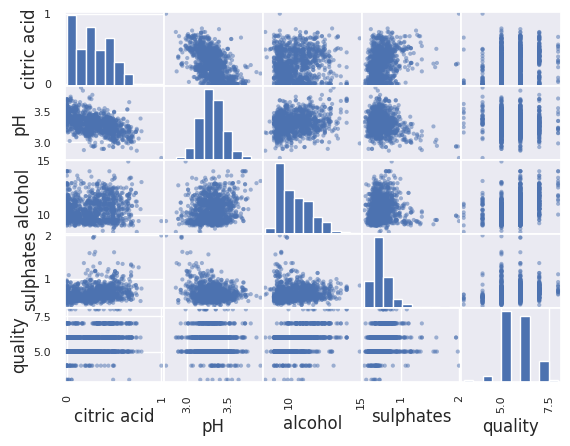

In [30]:
#Another option to visualize the relationship between the
#feature is with scatter matrix.

from pandas.plotting import scatter_matrix
attribute_list = ['citric acid', 'pH', 'alcohol', 'sulphates', 'quality']
scatter_matrix(exploration_set[attribute_list])

In [31]:
#Typical steps in data preprocessing are as follows:
#1. Separate features and labels.
#2. Handling missing values and outliers.
#3. Feature scaling to bring all features on the same scale.
#4. Applying certain transformations like log, square root on the features.

In [33]:
#Separate features and labels from the training set.
# Copy all features leaving aside the label.
wine_features = strat_train_set.drop("quality", axis=1)
# Copy the label list
wine_labels = strat_train_set['quality'].copy()

In [34]:
#Data cleaning
#Let's first check if there are any missing values in feature set: One way to find that out is
#column-wise.
wine_features.isna().sum() # counts the number of NaN in each column of wine_features

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [35]:
#In case, we have non-zero numbers in any columns, we have a problem of missing
#values.

#These values are missing due to errors in recording or they do not exist.
#If they are not recorded:
#Use imputation technique to fill up the missing values.
#Drop the rows containing missing values.
#f they do not exists, it is better to keep it as NaN.

In [36]:
#Sklearn provides the following methods to drop rows containing missing values:

#dropna()
#drop()

#It provides SimpleImputer class for filling up missing values with. say, median value.

In [37]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [39]:
imputer.fit(wine_features)
#In case, the features contains non-numeric attributes, they need to be dropped before
#calling the fit method on imputer object.

SimpleImputer(strategy='median')

In [41]:
imputer.statistics_
#Note that these are median values for each feature. We can cross-check it by calculating
#median on the feature set:

array([ 7.9    ,  0.52   ,  0.26   ,  2.2    ,  0.08   , 14.     ,
       39.     ,  0.99675,  3.31   ,  0.62   , 10.2    ])

In [42]:
wine_features.median()

fixed acidity            7.90000
volatile acidity         0.52000
citric acid              0.26000
residual sugar           2.20000
chlorides                0.08000
free sulfur dioxide     14.00000
total sulfur dioxide    39.00000
density                  0.99675
pH                       3.31000
sulphates                0.62000
alcohol                 10.20000
dtype: float64

In [43]:
#Finally we use the trained imputer to transform the training set such that the missing
#values are replaced by the medians:

tr_features = imputer.transform(wine_features)

In [44]:
tr_features.shape

(1279, 11)

In [45]:
#This returns a Numpy array and we can convert it to the dataframe if needed:

In [46]:
wine_features_tr = pd.DataFrame(tr_features, columns=wine_features.columns)

In [47]:
#Handling text and categorical attributes
#Converting categories to numbers:

from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

In [49]:
#Call fit_transform() method on ordinal_encoder object to convert text to numbers.
#The list of categories can be obtained via categories_ instance variable.

#One issue with this representation is that the ML algorithm would assume that the
#two nearby values are closer than the distinct ones.

In [51]:
#Using one hot encoding
#Here we create one binary feature per category - the feature value is 1 when the category
#is present else it is 0.
#Only one feature is 1 (hot) and the rest are 0 (cold).
#The new features are referred to as dummy features.
#Scikit-Learn provides a OneHotEncoder class to convert categorical values into one-hot
#vectors.

from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()

#We need to call fit_transform() method on OneHotEncoder object.
#The output is a SciPy sparse matrix rather than NumPy array. This enables us to save
#space when we have a huge number of categories.
#In case we want to convert it to dense representation, we can do so with toarray()
#method.
#The list of categories can be obtained via categories_ instance variable.

#As we observed that when the number of categories are very large, the one-hot encoding
#would result in a very large number of features.
#This can be addressed with one of the following approaches:
#Replace with categorical numerical features
#Convert into low-dimensional learnable vectors called embeddings

In [52]:
#Feature Scaling
#Most ML algorithms do not perform well when input features are on very different
#scales.
#Scaling of target label is generally not required.

#Min-max scaling or Normalization
#We subtract minimum value of a feature from the current value and divide it by the
#difference between the minimum and the maximum value of that feature.
#Values are shifted and scaled so that they range between 0 and 1.
#Scikit-Learn provides MinMaxScalar transformer for this.
#One can specify hyperparameter feature_range to specify the range of the feature.

#Standardization
#We subtract mean value of each feature from the current value and divide it by the
#standard deviation so that the resulting feature has a unit variance.
#While normalization bounds values between 0 and 1, standardization does not bound
#values to a specific range.
#Standardization is less affected by the outliers compared to the normalization.
#Scikit-Learn provides StandardScalar transformation for feature standardization.
#Note that all these transformers are learnt on the training data and then applied on the
#training and test data to tranform them.
#Never learn these transformers on the full dataset.

In [54]:
#Transformation Pipeline
#Scikit-Learn provides a Pipeline class to line up transformations in an intended order.
#Here is an example pipeline:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
transform_pipeline = Pipeline([
('imputer', SimpleImputer(strategy="median")),
('std_scaler', StandardScaler()),])
wine_features_tr = transform_pipeline.fit_transform(wine_features)

#Let's understand what is happening here:
#Pipeline has a sequence of transformations - missing value imputation followed by
#standardization.
#Each step in the sequence is defined by name, estimator pair.
#Each name should be unique and should not contain __ (double underscore).

In [56]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
transform_pipeline = Pipeline([
('imputer', SimpleImputer(strategy="median")),
('std_scaler', StandardScaler()),])
wine_features_tr = transform_pipeline.fit_transform(wine_features)

#The output of one step is passed on the next one in sequence until it reaches the last
#step.
#Here the pipeline first performs imputation of missing values and its result is passed for
#standardization.
#The pipeline exposes the same method as the final estimator.
#Here StandardScalar is the last estimator and since it is a transformer, we call
#fit_transform() method on the Pipeline object.

In [57]:
#How to transform mixed features?

#The real world data has both categorical as well as numerical features and we need to
#apply different transformations to them.
#Scikit-Learn introduced ColumnTransformer for this purpose.

from sklearn.compose import ColumnTransformer

#In our dataset, we do not have features of mixed types. All our features are numeric.

In [58]:
#For the illustration purpose, here is an example code snippet:

num_attribs = list(wine_features)
cat_attribs = ["place_of_manufacturing"]
full_pipeline = ColumnTransformer([
("num", num_pipeline, num_attribs),
("cat", OneHotEncoder(), cat_attribs),
])
wine_features_tr = full_pipeline.fit_transform(wine_features)

#For the illustration purpose, here is an example code snippet:

#Here we apply num_pipeline on numerical features and OneHotEncoder transformation on
#the categorical features.
#The ColumnTransformer applies each transformation to the appropriate columns and then
#concatenates the outputs along the columns.
#Note that all transformers must return the same number of rows.
#The numeric transformers return dense matrix while the categorical ones return sparse
#matrix. The ColumnTransformer automatically determines the type of the output based on
#the density of the resulting matrix.

61

NameError: name 'num_pipeline' is not defined

In [59]:
#Select and train ML model
#It's a good practice to build a quick baseline model on the preprocessed data and get
#an idea about model performance.

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(wine_features_tr, wine_labels)

LinearRegression()

In [60]:
#Now that we have a working model of a regression, let's evaluate performance of the
#model on training as well as test sets. For regression models, we use mean squared error as an evaluation measure.

from sklearn.metrics import mean_squared_error
quality_predictions = lin_reg.predict(wine_features_tr)
mean_squared_error(wine_labels, quality_predictions)

0.4206571060060278

In [61]:
#Let's evaluate performance on the test set.
#We need to first apply transformation on the test set and then apply the model prediction
#function.

# copy all features leaving aside the label.
wine_features_test = strat_test_set.drop("quality", axis=1)
# copy the label list
wine_labels_test = strat_test_set['quality'].copy()
# apply transformations
wine_features_test_tr = transform_pipeline.fit_transform(wine_features_test)
# call predict function and calculate MSE.
quality_test_predictions = lin_reg.predict(wine_features_test_tr)
mean_squared_error(wine_labels_test, quality_test_predictions)

0.3975913087501519

Text(0, 0.5, 'Predicted quality')

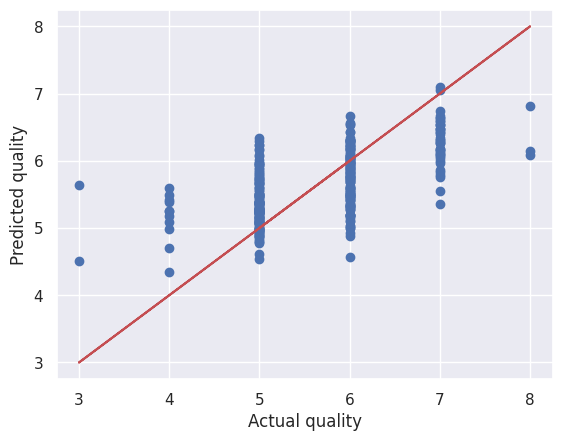

In [62]:
#Let's visualize the error between the actual and predicted values.

plt.scatter(wine_labels_test, quality_test_predictions)
plt.plot(wine_labels_test, wine_labels_test, 'r-')
plt.xlabel('Actual quality')
plt.ylabel('Predicted quality')

In [63]:
#The model seem to be making errors
#on the best and poor quality wines.

#Let's try another model: DecisionTreeRegressor.

from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(wine_features_tr, wine_labels)

DecisionTreeRegressor()

In [64]:
quality_predictions = tree_reg.predict(wine_features_tr)
mean_squared_error(wine_labels, quality_predictions)

0.0

In [65]:
quality_test_predictions = tree_reg.predict(wine_features_test_tr)
mean_squared_error(wine_labels_test, quality_test_predictions)

0.55625

In [66]:
#Note that the training error is 0, while the test error is 0.58. This is an example of an
#overfitted model.

Text(0, 0.5, 'Predicted quality')

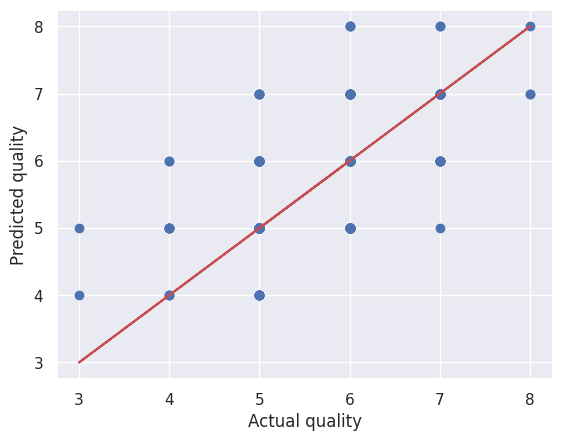

In [67]:
plt.scatter(wine_labels_test, quality_test_predictions)
plt.plot(wine_labels_test, wine_labels_test, 'r-')
plt.xlabel('Actual quality')
plt.ylabel('Predicted quality')

In [68]:
#We can use cross-validation (CV) for robust evaluation of model performance.

from sklearn.model_selection import cross_val_score

In [70]:
#Cross validation provides a separate MSE for each validation set, which we can
#use to get a mean estimation of MSE as well as the standard deviation, which
#helps us to determine how precise is the estimate.
#The additional cost we pay in cross validation is additional training runs, which
#may be too expensive in certain cases.

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [71]:
#Linear Regression CV

scores = cross_val_score(lin_reg, wine_features_tr, wine_labels,
scoring="neg_mean_squared_error", cv=10)
lin_reg_mse_scores = -scores
display_scores(lin_reg_mse_scores)

Scores: [0.56364537 0.4429824  0.38302744 0.40166681 0.29687635 0.37322622
 0.33184855 0.50182048 0.51661311 0.50468542]
Mean: 0.431639217212196
Standard deviation: 0.08356359730413968


In [72]:
#Decision tree CV

scores = cross_val_score(tree_reg, wine_features_tr, wine_labels,
scoring="neg_mean_squared_error", cv=10)
tree_mse_scores = -scores
display_scores(tree_mse_scores)

Scores: [0.6015625  0.625      0.5703125  0.5390625  0.4296875  0.5859375
 0.609375   0.734375   0.765625   0.98425197]
Mean: 0.6445189468503937
Standard deviation: 0.1441640213155553


In [73]:
#Let's compare scores of Linear regression (LinReg) and decision tree
#(DT)regressions:

#LinReg has better MSE and more precise estimation compared to DT.

In [74]:
#Random forest CV

#Random forest model builds multiple decision trees on randomly selected features
#and then average their predictions.
#Building a model on top of other model is called ensemble learning, which is often
#used to improve performance of ML models.

from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(wine_features_tr, wine_labels)
scores = cross_val_score(forest_reg, wine_features_tr, wine_labels,
scoring="neg_mean_squared_error", cv=10)
forest_mse_scores = -scores
display_scores(forest_mse_scores)

Scores: [0.38442109 0.42635156 0.30177734 0.31290859 0.21469453 0.28420391
 0.25987578 0.39577344 0.44683359 0.45190079]
Mean: 0.3478740631151575
Standard deviation: 0.07955197500505176


In [75]:
quality_test_predictions = forest_reg.predict(wine_features_test_tr)
mean_squared_error(wine_labels_test, quality_test_predictions)

0.34418718750000005

Text(0, 0.5, 'Predicted quality')

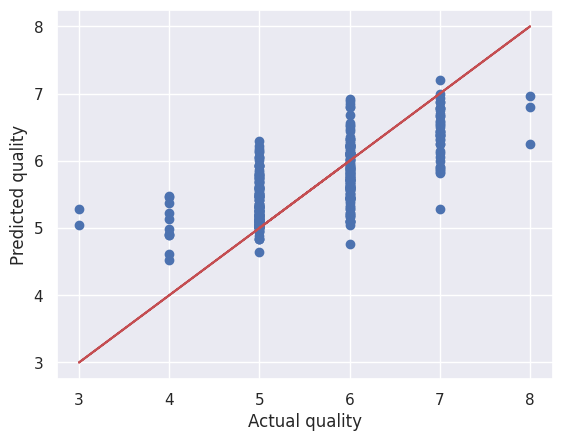

In [76]:
plt.scatter(wine_labels_test, quality_test_predictions)
plt.plot(wine_labels_test, wine_labels_test, 'r-')
plt.xlabel('Actual quality')
plt.ylabel('Predicted quality')

In [77]:
#Random forest looks more promising than the other
#two models.
#It's a good practice to build a few such models
#quickly without tuning their hyperparameters and
#shortlist a few promising models among them.
#Also save the models to the disk in Python pickle
#format.

In [78]:
#What to do next?

#Model diagnosis --> Remedy

#Underfitting -->  Models with more capacity

#                         Less

#                  constraints/regularization

#Overfitting -->      More data
#                     Simpler model
#                        More

#                    constraints/regularization

In [79]:
# Finetune your model
#Usually there are a number of hyperparameters in the model, which are set
#manually.
#Tuning these hyperparameters lead to better accuracy of ML models.
#Finding the best combination of hyperparameters is a search problem in the
#space of hyperparameters, which is huge.

# Grid Search
from sklearn.model_selection import GridSearchCV

In [80]:
#We need to specify a list of hyperparameters along with the range of values to try.
#It automatically evaluates all possible combinations of hyperparameter values using
#cross-validation.

#For example, there are number of hyperparameters in RandomForest regression
#such as:

#Number of estimators
#Maximum number of features

param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

In [81]:
#Here the parameter grid contains two combinations:
#1. The first combination contains n_estimators with 3 values and max_features with
#4 values.
#2. The second combination has an additional bootstrap parameter, which is set to
#False. Note that it was set to its default value, which is True, in the first grid.

In [83]:
#Let's compute the total combinations evaluated here:

#Let's create an object of GridSearchCV:

#1. The first one results in 3 × 4 = 12 combinations.
#2. The second one has 2 values of n_estimators and 3 values of max_features, thus
#resulting 2 × 3 = 6 in total of values.

#The total number of combinations evaluated by the parameter grid 12 + 6 = 18
#Let's create an object of GridSearchCV:

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
scoring='neg_mean_squared_error',

return_train_score=True)

# In this case, we set cv=5 i.e. using 5 fold cross validation for training the model.
#We need to train the model for 18 parameter combinations and each combination
#would be trained 5 times as we are using cross-validation here.
#The total model training runs = 18 × 5 = 90


In [84]:
#Let's launch the hyperparameter search:


grid_search.fit(wine_features_tr, wine_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [85]:
#The best parameter combination can be obtained as follows:


grid_search.best_params_

{'max_features': 4, 'n_estimators': 30}

In [87]:
#Let's find out the error at different parameter settings:

cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(-mean_score, params)

0.4951845043572984 {'max_features': 2, 'n_estimators': 3}
0.3917796262254901 {'max_features': 2, 'n_estimators': 10}
0.363478455201525 {'max_features': 2, 'n_estimators': 30}
0.4810848992374727 {'max_features': 4, 'n_estimators': 3}
0.39122303921568624 {'max_features': 4, 'n_estimators': 10}
0.35634977532679735 {'max_features': 4, 'n_estimators': 30}
0.4713286356209149 {'max_features': 6, 'n_estimators': 3}
0.37741731004901957 {'max_features': 6, 'n_estimators': 10}
0.37112842796840956 {'max_features': 6, 'n_estimators': 30}
0.5166445397603485 {'max_features': 8, 'n_estimators': 3}
0.37876354166666665 {'max_features': 8, 'n_estimators': 10}
0.3676874319172113 {'max_features': 8, 'n_estimators': 30}
0.4672004357298475 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.3749003676470588 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.4844818899782134 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.37612567401960784 {'bootstrap': False, 'max_features': 

In [88]:
#As you can notice the lowest MSE is obtained for the best parameter combination.

#Let's obtain the best estimator as follows:

grid_search.best_estimator_

RandomForestRegressor(max_features=4, n_estimators=30)

In [89]:
#GridSearchCV is initialized with refit=True option, which retrains the best
#estimator on the full training set. This is likely to lead us to a better model as it is
#trained on a larger dataset.

In [90]:
#Randomized Search

#When we have a large hyperparameter space, it is desirable to try
#RandomizedSearchCV.
#It selects a random value for each hyperparameter at the start of each iteration and
#repeats the process for the given number of random combinations.
#It enables us to search hyperparameter space with appropriate budget control.


from sklearn.model_selection import RandomizedSearchCV

In [91]:
#Analysis of best model and its errors
#Analysis of the model provides useful insights about features. let's obtain the feature
#importance as learnt by the model:

feature_importances = grid_search.best_estimator_.feature_importances_

In [92]:
sorted(zip(feature_importances, feature_list), reverse=True)

[(np.float64(0.22100619489324094), 'alcohol'),
 (np.float64(0.14067594453925153), 'sulphates'),
 (np.float64(0.12262915479988136), 'volatile acidity'),
 (np.float64(0.0839273698194603), 'total sulfur dioxide'),
 (np.float64(0.07893479790105946), 'density'),
 (np.float64(0.0671307101434975), 'citric acid'),
 (np.float64(0.06377262657030373), 'chlorides'),
 (np.float64(0.05880060973847574), 'fixed acidity'),
 (np.float64(0.05787080477915515), 'pH'),
 (np.float64(0.05644114930558361), 'residual sugar'),
 (np.float64(0.048810637510090675), 'free sulfur dioxide')]

In [93]:
#Based on this information, we may drop features that are not so important.
#It is also useful to analyze the errors in prediction and understand its causes and fix
#them.

In [94]:
#Evaluation on test set
#Now that we have a reasonable model, we evaluate its performance on the test set. The
#following steps are involved in the process:

In [95]:
#Transform the test features

# copy all features leaving aside the label.
wine_features_test = strat_test_set.drop("quality", axis=1)
# copy the label list
wine_labels_test = strat_test_set['quality'].copy()
# apply transformations
wine_features_test_tr = transform_pipeline.fit_transform(wine_features_test)

In [96]:
#Use the predict method with the trained model and the test set.

quality_test_predictions = grid_search.best_estimator_.predict(
wine_features_test_tr)

In [97]:
#3.Compare the predicted labels with the actual ones and report the evaluation metrics.

mean_squared_error(wine_labels_test, quality_test_predictions)

0.3550833333333333

In [98]:
#4.It's a good idea to get 95% confidence interval of the evaluation metric. It can be
#obtained by the following code:

from scipy import stats
confidence = 0.95
squared_errors = (quality_test_predictions - wine_labels_test) ** 2
stats.t.interval(confidence, len(squared_errors) - 1,
loc=squared_errors.mean(),
scale=stats.sem(squared_errors))

(np.float64(0.29348196595147064), np.float64(0.416684700715196))

In [99]:
#Present your solution

#Once we have satisfactory model based on its performance on the test set, we reach
#the prelaunch phase.
#Before launch,
#1. We need to present our solution that highlights learnings, assumptions and
#systems limitation.
#2. Document everything, create clear visualizations and present the model.
#3. In case, the model does not work better than the experts, it may still be a
#good idea to launch it and free up bandwidths of human experts.